# Bean Classification Project Proposal 

In [1]:
#import libraries
install.packages("themis")
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 16)
library(readxl)
library(ggplot2)
library(cowplot)

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   

In [2]:
library(themis)

# Introduction

This data set was extracted from the article written by Kolku and Ozkan, “Multiclass classification of dry beans using computer vision and machine learning techniques” (2020). Koluk and Ozkan (2020) explore the use of computer vision and machine learning techniques to classify dry beans into different classes. The goal of the study was to use machine learning algorithms to accurately classify the dry beans into their respective varieties based on the extracted features. This study is relevant for the food industry and agriculture, as it can potentially help in automating the classification process of dry beans, which is currently done manually and is time-consuming.

**Research Question**: Can we determine the bean type in an image based on its Area and Roundness?

This dataset is based on 13611 images of 7 types of individual dry beans with similar features. Each image was analyzed for 16 features of the bean (4 "shape factors", 12 structural/geometric features) (Kolku & Ozkan, 2020). While the dataset use up to 12 predictors to classify the data points, we will try to reduce the number of the predictor and see if the accuracy of the estimate still has high or nearly has high.

We will be using the K-nearest neighbours classification to predict "Class" using the mentioned predictors. K-nearest neighbours find the K-closest data points to the input sample and assign the most common class label among them. The accuracy of the model can be improved by tuning the value of K.


Our variable of intetrest (Kolku & Ozkan, 2020).:
- **Area**:The area of a bean zone and the number of pixels within its boundaries.
- **Roundness**: Calculated with the following formula: (4piA)/(P^2). Where A is the area and P is the perimeter of the bean

# Methods

**Load Data**: A zip file was loaded from the original web source (https). Then, tempfile () was used to ... 


In [3]:
beanurl<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
temp <- tempfile()
download.file(beanurl,temp)
beanzip <- unzip(temp, "DryBeanDataset/Dry_Bean_Dataset.xlsx")
bean <- read_excel(beanzip)
bean

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER
30477,670.033,211.0502,184.0391,1.146768,0.4894779,30970,196.9886,0.7624015,0.9840814,0.8530799,0.9333736,0.006924899,0.003242016,0.8711862,0.9990487,SEKER
30519,629.727,212.9968,182.7372,1.165591,0.5137596,30847,197.1243,0.7706818,0.9893669,0.9671092,0.9254804,0.006979152,0.003158285,0.8565140,0.9983446,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


Table 1: Raw Bean dataset

**Select variables & data wrangling & cleaning**: After exploring the data and doing research, we will select two variables for prediction: roundness and area, as according to our research question, and since these two variable produce distinct clusters by bean type, which is helpful in classifying the datapoints (as seen later on in Figure 1).

In [4]:
select_bean_var <- bean |>
                select("Area","roundness","Class")
select_bean_var 

Area,roundness,Class
<dbl>,<dbl>,<chr>
28395,0.9580271,SEKER
28734,0.8870336,SEKER
29380,0.9478495,SEKER
30008,0.9039364,SEKER
30140,0.9848771,SEKER
30279,0.9438518,SEKER
30477,0.8530799,SEKER
30519,0.9671092,SEKER
⋮,⋮,⋮


Table 2: Bean data frame with chosen variable

**Visualize plot**: all of the bean types, in relation to roundness and area, are plotted on the graph. 

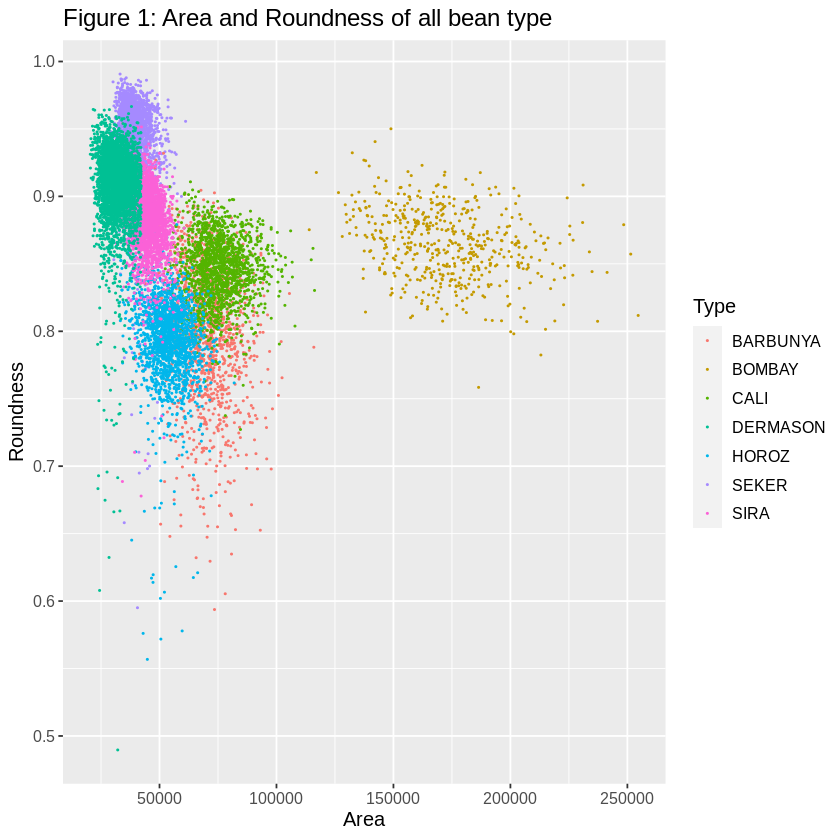

In [5]:
bean_plot <- select_bean_var |>
  ggplot(aes(x = Area, y = roundness, color = Class)) +
  geom_point(size = 0.2) +
  labs(x = "Area", 
       y = "Roundness",
       color = "Type") +
  ggtitle("Figure 1: Area and Roundness of all bean type")+
  theme(text = element_text(size = 12))
bean_plot

As shown in Figure 1, Barbunya has a lack of clustering that causes too many overlaps. This may result in an inaccurate model. Thus, we will remove the Class Barbunva. which will enable the KNN model to better distinguish between the remaining classes, ultimately improving the overall accuracy of the model. The "Class" column was also converted to a factor type for this classification model. 

In [6]:
select_bean <- select_bean_var|>
                filter(Class != "BARBUNYA")|>
                mutate(Class = as.factor(Class))
select_bean

Area,roundness,Class
<dbl>,<dbl>,<fct>
28395,0.9580271,SEKER
28734,0.8870336,SEKER
29380,0.9478495,SEKER
30008,0.9039364,SEKER
30140,0.9848771,SEKER
30279,0.9438518,SEKER
30477,0.8530799,SEKER
30519,0.9671092,SEKER
⋮,⋮,⋮


Table 3: Bean dataframe with Barbunya filtered out

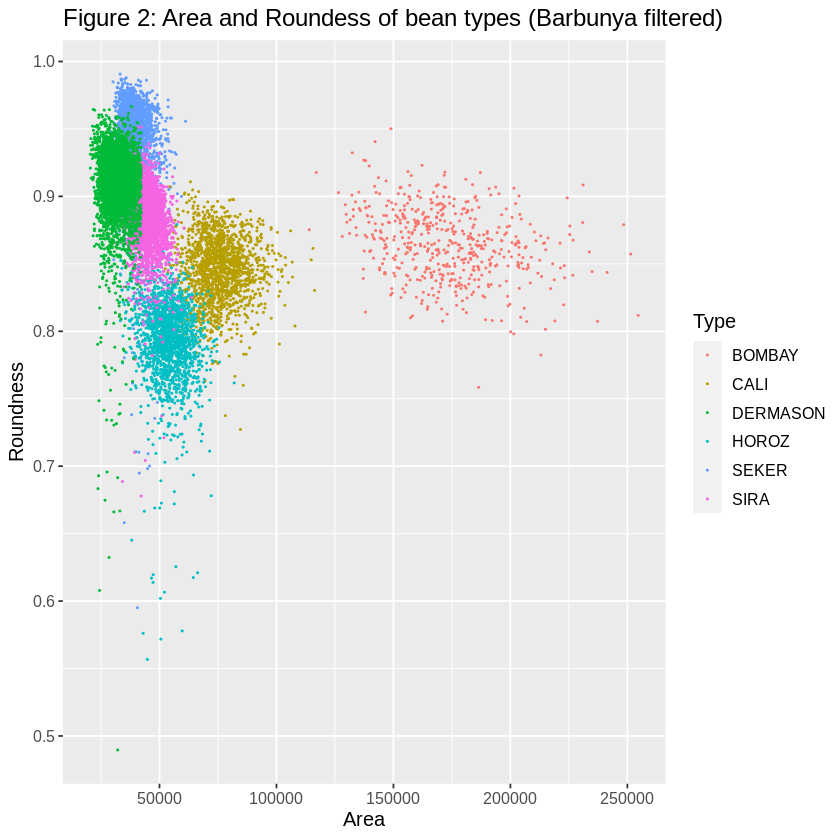

In [7]:
bean_plot2 <- select_bean |>
  ggplot(aes(x = Area, y = roundness, color = Class)) +
  geom_point(size = 0.2) +
  labs(x = "Area", 
       y = "Roundness",
       color = "Type") +
  ggtitle("Figure 2: Area and Roundess of bean types (Barbunya filtered)")+
  theme(text = element_text(size = 12))
bean_plot2

We graph it again, and we can see that the clusters in Figure 2 are more clean.

In [8]:
##Creating training and testing dataset

set.seed(2022)
bean_split <- initial_split(select_bean, prop = 0.75, strata = Class)
bean_train <- training(bean_split)
bean_test <- testing(bean_split)

Graphing the training dataset in plot point

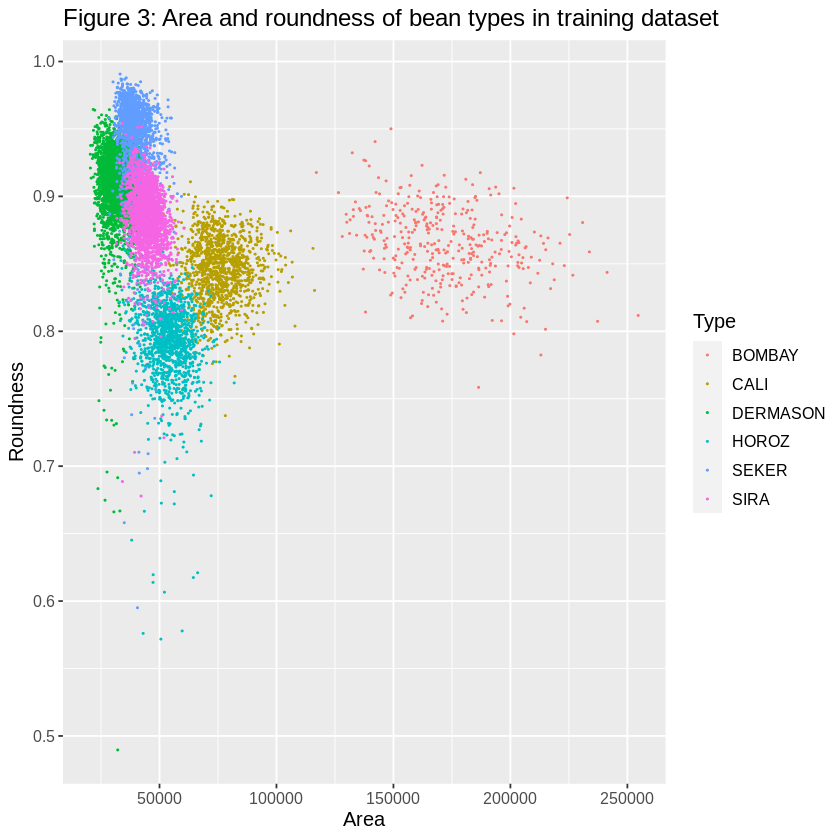

In [9]:
area_round_plot <- bean_train |>
  ggplot(aes(x = Area, y = roundness, color = Class)) +
  geom_point(size = 0.2) +
  labs(x = "Area", 
       y = "Roundness",
       color = "Type") +
  ggtitle("Figure 3: Area and roundness of bean types in training dataset")+
  theme(text = element_text(size = 12))
area_round_plot

From Figure 3, we can see that there are big difference between area value and the roundness value, therefore, we will scale the data, which will be dealt with in `workflow()` 

In [10]:
#Summarize training dataset
bean_class_dist <- bean_train |>
                group_by(Class)|>
                summarize(count = n()) |>
                mutate(percentage_dist = 100*count/nrow(bean_train))
bean_class_dist

Class,count,percentage_dist
<fct>,<int>,<dbl>
BOMBAY,380,4.123711
CALI,1222,13.260988
DERMASON,2667,28.941942
HOROZ,1447,15.702659
SEKER,1524,16.538253
SIRA,1975,21.432447


Table 4: Distribution of bean types in training set

The table, and bar chart show us the distribution of bean types in the training set

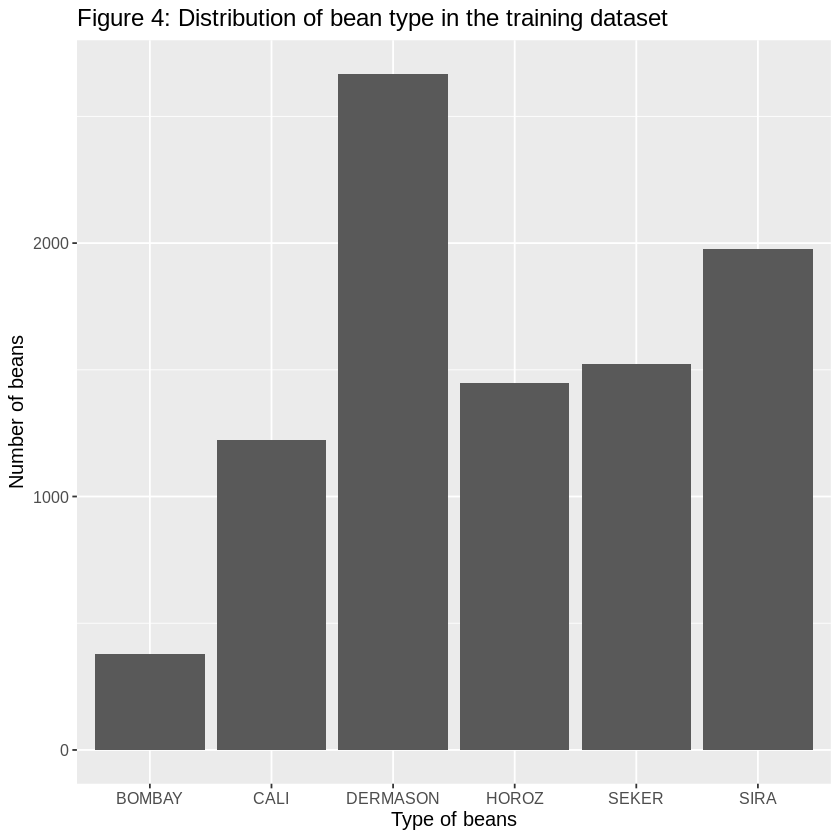

In [11]:
bean_class_dist_plot <- bean_class_dist |>
                        ggplot(aes(x=Class, y = count))+
                        geom_bar(stat = "identity")+
                        labs(x= "Type of beans",
                             y = "Number of beans")+
                        ggtitle("Figure 4: Distribution of bean type in the training dataset")+
                        theme(text = element_text(size = 12))
bean_class_dist_plot

**Upsampling**: By looking at the Table 3, and Figure 4 viewing the total number of datapoints for each type of beans, we can see that there are a big difference in number of datapoints between Dermason bean type with other type of beans. Therefore, we will upsample the training dataset so that each Class of bean has a voting power when it comes to the classfication of the testing dataset.

**Scaling:** all data is called to avoid features with large values dominating the decision process. The Scaling of the data later be part of the Classifier building process called `workflow()`

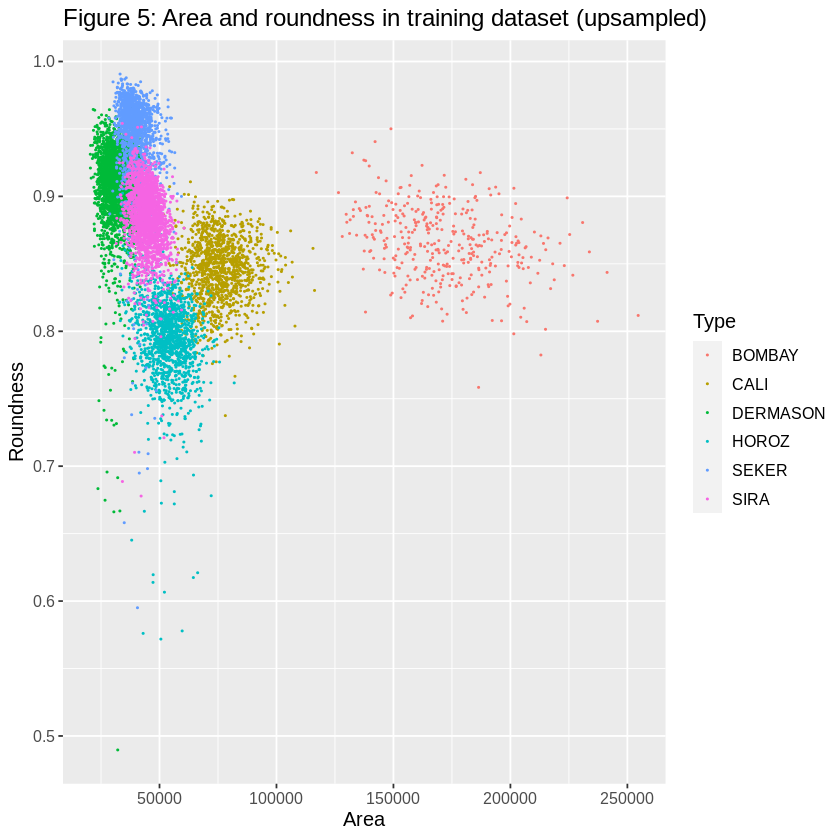

In [12]:
## Scalling all data:

bean_data_training_scaled_recipe <- recipe(Class ~., data = bean_train) |>
                        step_upsample()|>
                        prep()

final_bean_data <- bake(bean_data_training_scaled_recipe, bean_train)

area_round_plot_scaled <- final_bean_data |>
  ggplot(aes(x = Area, y = roundness, color = Class)) +
  geom_point(size = 0.2) +
  labs(x = "Area", 
       y = "Roundness",
       color = "Type") +
  ggtitle("Figure 5: Area and roundness in training dataset (upsampled)")+
  theme(text = element_text(size = 12))
area_round_plot_scaled

Summary of the data set: Next we will look at Statistical distribution of our chosen variables, in table and boxplot form. We calculated the basic statistics such as range and standard deviation for each feature, as well as determining the distribution. 


In [13]:
#Statistical Distribution of predictor based on class
features_dist_by_class <- final_bean_data |>
                group_by(Class)|>
                summarize(max_area = max(Area, na.rm = TRUE),
                          min_area = min(Area, na.rm = TRUE),
                          std_dev_area = sd(Area, na.rm = TRUE),
                          max_roundness = max(roundness, na.rm = TRUE),
                          min_roundness = min(roundness, na.rm = TRUE),
                         std_dev_roundness = sd(roundness, na.rm = TRUE))
features_dist_by_class

Class,max_area,min_area,std_dev_area,max_roundness,min_roundness,std_dev_roundness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BOMBAY,254616,117034,22827.238,0.9501045,0.7584168,0.02733660
CALI,116272,45504,9417.061,0.9107939,0.7374636,0.02318165
DERMASON,42159,20420,4670.699,0.9666028,0.4896183,0.02917184
HOROZ,81929,33006,7381.962,0.9190136,0.5718009,0.03143601
SEKER,59385,28395,4814.962,0.9906854,0.5950484,0.03290233
SIRA,60493,31519,4543.983,0.9541042,0.6778369,0.02382635


Table 5: Statistical distribution of each predictor based on their class

In [14]:
#Statistical Distribution in Features of varieties of dry bean
features_dist <- bean_train |>
            select(Area,roundness) |>
            pivot_longer(cols= Area:roundness,
                         names_to = "Features",
                         values_to = "values") |>
            group_by(Features) |>
            summarize(Mean = mean(values, na.rm = TRUE),
                      Min = min(values, na.rm = TRUE),
                      Max = max(values, na.rm = TRUE),
                     Std_Deviation = sd(values, na.rm = TRUE))
features_dist

Features,Mean,Min,Max,Std_Deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Area,5.108452e+04,2.042000e+04,2.546160e+05,2.964613e+04
roundness,8.813456e-01,4.896183e-01,9.906854e-01,5.496258e-02


Table 6: Statistical distribution of the predictors in the whole dataset

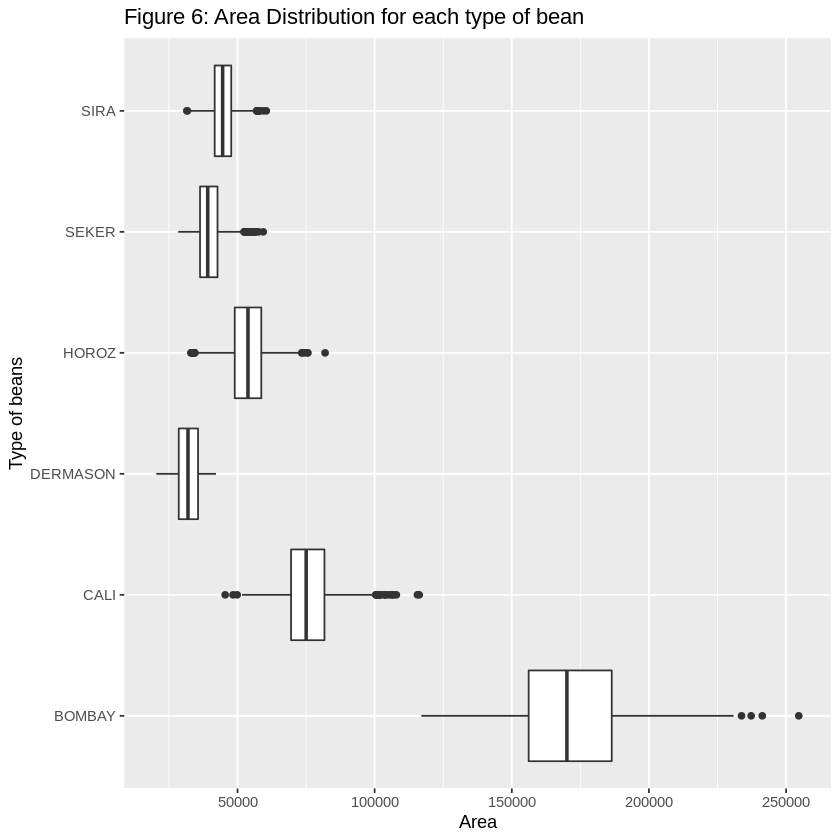

In [15]:
#Graphing area distribution for each type of bean
area_box_plot <- final_bean_data |>
                ggplot(aes(x = Class, y = Area))+
                geom_boxplot()+
                xlab("Type of beans")+
                ylab("Area")+
                ggtitle("Figure 6: Area Distribution for each type of bean")+
                coord_flip()
area_box_plot

By looking at Figure 5, we can find that 50% of each bean type has little overlap over each other. we can also find that 5/6 bean type (Sira, Seker, Horoz, Cali, and Bombay) has outliers that is higher than 50% of its usual area size. We might expect that these outliers might also affect the accuracy of the classifier as these outliers starts overlapping over other bean types area measurements. However, out of all the bean type Bombay seems to have its distribution in area distinguished over other bean type, so we might see that the classifier can predict the Bombay bean type better than other type. While Sira and Seker area distribution seems to over over each other so we also expect that the classifier might confuse between these two bean type, and predict one over other.

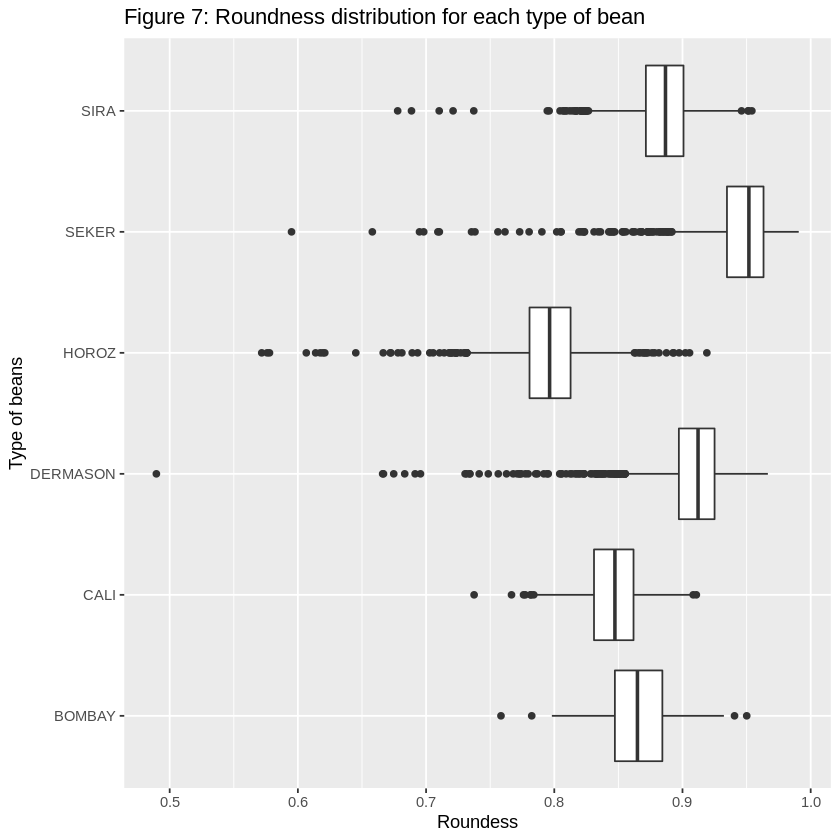

In [16]:
#Graphing box plot showing roundness distribution for each type of box plot
roundness_box_plot <- final_bean_data |>
                ggplot(aes(x = Class, y = roundness))+
                geom_boxplot()+
                xlab("Type of beans")+
                ylab("Roundess")+
                ggtitle("Figure 7: Roundness distribution for each type of bean")+
                coord_flip()
roundness_box_plot

In Figure 7, we can see that most of the bean type 50% of roundness distribution does not overlap each other. However there are a lot of outliers that cause these bean type roundness distribution to overlap each other. The overlap of roundness distribution of dataset matches the distribution of bean type of Area and Roundness that we see in Figure 1, 2, 3, 5. However, due to 50% of the dataset mostly don't overlap each other as we seen in Figure 7, we can also see distinct cluster in Figure 1,2, 3, 5

# Building the Classification Model

Now we should start building the classifier. However, before starting to build the classifier, we need to create the scaling and centering recipe on the training dataset, to ensure that all predictors are standardized, so that predictor with larger scales won't create a greater unwanted affect.

In [17]:
set.seed(2022) # DO NOT REMOVE

bean_report_recipe <- recipe(Class ~., data = final_bean_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
bean_report_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Next, we need to tune our model using the cross-validation method, so that we can choose the optimal K-neighbour. First we need to specify the model for cross-validation, where the neighbour = tune() is used to test accuracies of model across different range of k-neighbours

In [18]:
set.seed(2022) # DO NOT REMOVE

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

Now we use the `vfold_cv()` to split the training data into 10 fold for cross-validation. `gridvals` is where we set the range of k-neighbours that we would like to cross-validate with. Since we have run the this code a few time to get the best estimate of a range of k-neighbours to use, we decide only run upto 40 k-neighbours to get the best k-neighbours for our classifier

In [19]:
set.seed(2022) # DO NOT REMOVE
bean_vfold <- vfold_cv(final_bean_data, v = 10, strata = Class)
gridvals <- tibble(neighbors = seq(1,30,by=1))

Now we start to cross-validate multiple k-neighbours to the training dataset. The function `tune_grid()` here allow us to fit the model for each value in a range of value. After the cross-validation is run, we collect the accuracie calculated from each value of k-neighbours

In [20]:
set.seed(2022) # DO NOT REMOVE

knn_results <- workflow() |>
  add_recipe(bean_report_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = bean_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

Now we graph the k-neighbours against the mean accuracy calculated from cross-validated across 10 folds.

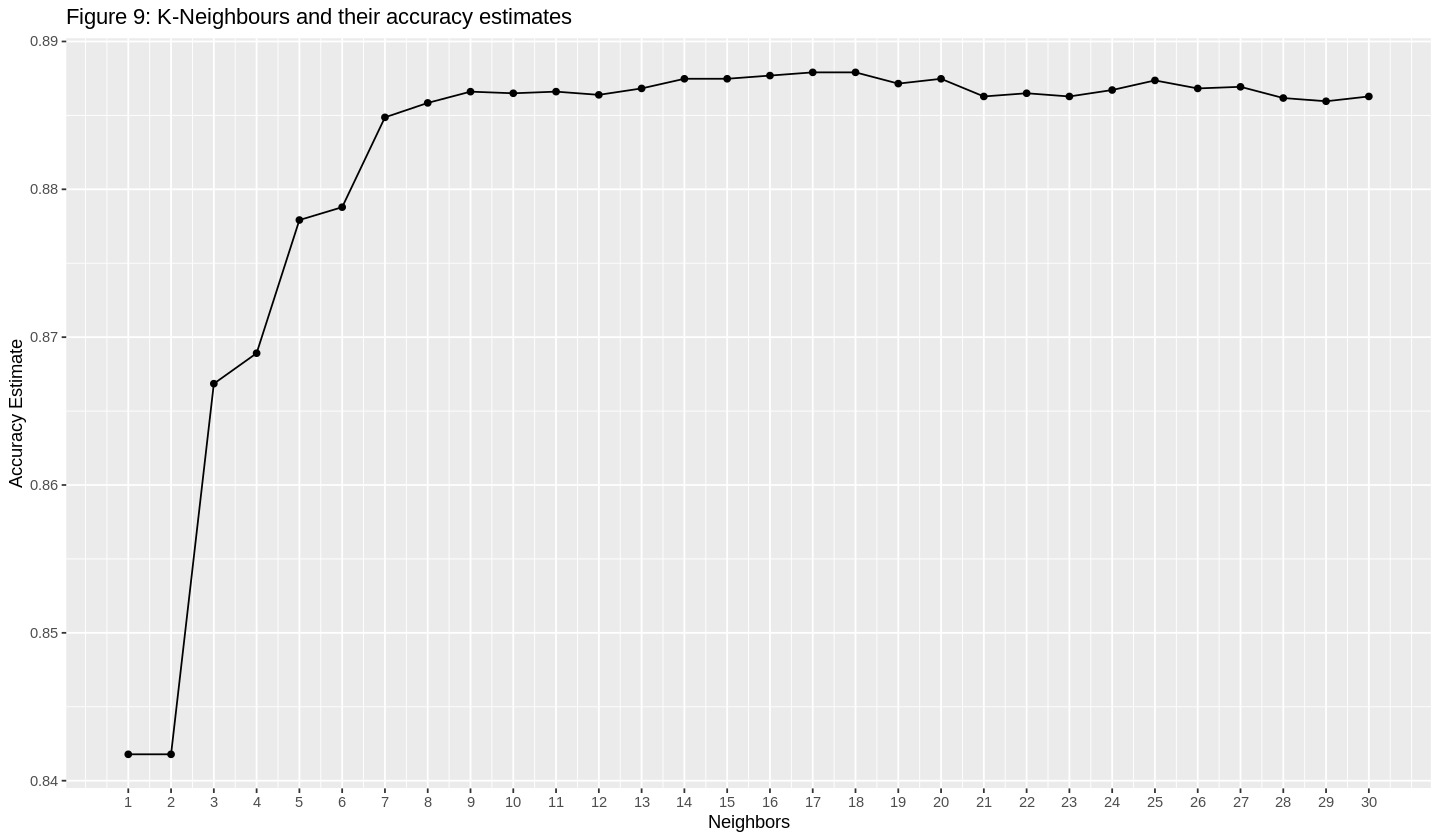

In [27]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 9: K-Neighbours and their accuracy estimates")+
    scale_x_continuous(breaks = seq(1,30, by = 1))
cross_val_plot

From Figure 9, we can see that with such a large dataset like the bean dataset, large number of neighbour is required to predict the data accurately. 

However, running cross validation for such a large dataset and large number of neighbors take a lot of time, and money, so we decided only estimate accuracies of different number of neighbors up until 45 neighbors. And it is clear that after 27 neighbours, the accuracies of different number of neighbors decreases, and the accuracies keeps decreasing until 40 neighbors, so we suspect that it will still decrease into 50 and 100 neighbors, which was proven true as we increase the neighbours in other trials.

From the graph we can see that the highest accuracies is around 25-27 neighbours. And we see that around 25 neighbors is good since the 26 neighbours, and 24 neighbours, the accuracies aren't that much different from the 25 neighbours. 

Visualizations of the analysis: a confusion matrix is shown below to help interpret the results and communicate the findings effectively.


Now that we have a good estimate of which neighbours yield the highest accuracy for our classification, we should build our classifier with that k-neighbour, in our case is: 25 neighbour. We first build the specification of the classifier using the best neighbour. Then we build the workflow with the best spec, and we can use the recipe that we created before. 

In [22]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
  set_engine("kknn") |>
  set_mode("classification")

bean_fit <- workflow() |>
  add_recipe(bean_report_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = final_bean_data)

Now we start using the new classifier that we just created to build predict our test dataset

In [23]:
# Get the prediction column
bean_predictions <- predict(bean_fit, bean_test) |> 
    bind_cols(bean_test)

Now we calculate the accuracy of the classifier by comparing the predictions to the test set

In [24]:
bean_acc <- bean_predictions |> 
    metrics(truth = Class, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
bean_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.8793103


Table 7: Accuracy estimate our model against the test set

Now we build a confusion matrix that compare the prediction made to the truth values

In [25]:
bean_cm <- bean_predictions |> 
    conf_mat(truth = Class, estimate = .pred_class)
bean_cm

          Truth
Prediction BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BOMBAY      141    0        0     0     0    0
  CALI          1  379        0     6     0    2
  DERMASON      0    0      781     3    71   72
  HOROZ         0   19        8   453     7   15
  SEKER         0    0       29     1   395   18
  SIRA          0   10       61    18    30  554

Table 8: Confusion matrix of the predicted class and the truth class

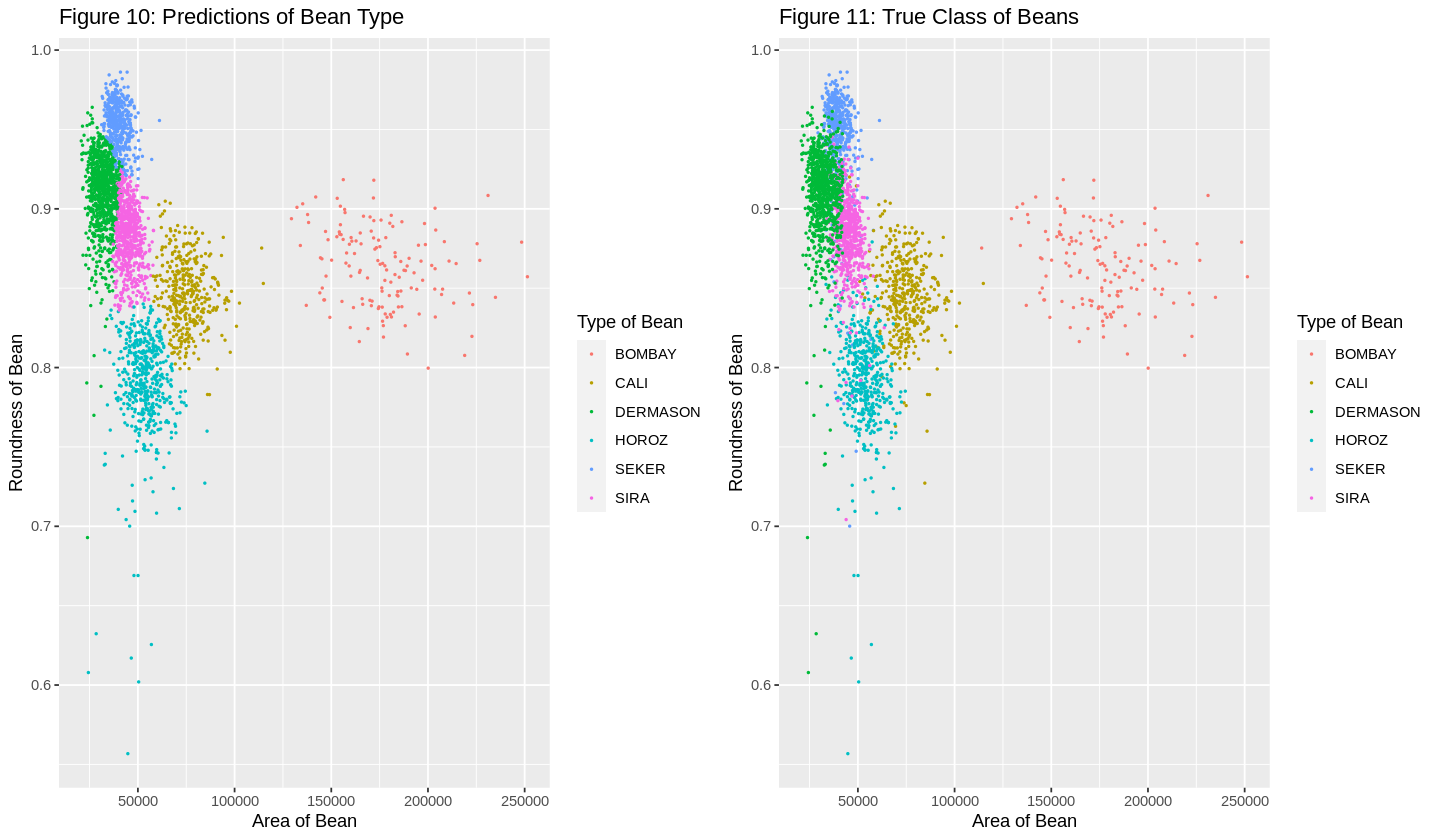

In [28]:
#visual comparison of true class vs predicted class

bean_predictions_plot <- bean_predictions |>
    ggplot(aes(x = Area, y = roundness, color = .pred_class)) +
    geom_point(size = 0.3) +
    labs(x = "Area of Bean", y = "Roundness of Bean", color = "Type of Bean") +
    ggtitle("Figure 10: Predictions of Bean Type")

bean_trueclass_plot <- bean_predictions |>
    ggplot(aes(x = Area, y = roundness, color = Class)) +
    geom_point(size = 0.3) +
    labs(x = "Area of Bean", y = "Roundness of Bean", color = "Type of Bean") +
    ggtitle("Figure 11: True Class of Beans")

plot_grid(bean_predictions_plot, bean_trueclass_plot, ncol = 2)

# Discussion

**Results**

With the help of a classification model, we expect to find a well-performing model that can predict the type of beans based on their roundness and area with at least 85% accuracy. From Table 7, the result of the k-nearest neighbors (k-NN) model shows an estimated accuracy of 0.8793103. This means that the model was able to correctly classify 87.93% of the beans in the dataset based on their area and roundness. This is a relatively high accuracy as the classes are similar in appearance and is difficult to differentiate based on these features alone. While this estimated accuracy is high, if we use all the predictor that was the proposed in the paper that the dataset was based on, the KNN algorithm will produce a classifier with a higher accuracy estimate (around 90% in the paper). 

Now looking at each individual class prediction, in Table 8, we can see that the classifier predicts the Bombay bean type correctly 100% of the time. While the classifier predicts the Sira bean type the least accurately, if we take the number of predictions that were correctly divided by the number of predictions made using Table 8, we can see that the classifier only predicts the Sira bean type correct 82% of the time, whereas the classifier predicts other bean types correctly more than 84% of the time. We can see the same result between Figure 10 and 11, where the classifier cannot predict Sira bean type that has roundness and area measurements that are similar to the Horoz bean type.

**Findings Impact**

This classification model can impact the food and agriculture industry. An automated system can be created to classifiy the type of bean based on their physical appearance. This is espcially useful when food and agriculture companies collect different types of beans together, dry them, and want to package them based on different types. The model we built can help to streamline the service, gain quality control and reduce the time for people to manually separate the beans. 

**Future research questions**
- Can other variables such as major axis length or the perimeter be good predictors of the type? And are they better predictors than roundness and area?
- Can the classification model be used for different types of crops such as rice? 

# References:
- Krzywinski, Martin, and Naomi Altman. "Visualizing samples with box plots: use box plots to illustrate the spread and differences of samples." Nature Methods, vol. 11, no. 2, Feb. 2014, pp. 119+. Gale OneFile: Health and Medicine, link.gale.com/apps/doc/A361242515/HRCA?u=ubcolumbia&sid=bookmark-HRCA&xid=0db0fe06. Accessed 11 Mar. 2023.

- Koklu, M., & Ozkan, I. A. (2020). Multiclass classification of dry beans using computer vision and machine learning techniques. Computers and Electronics in Agriculture, 174, 105507. https://doi.org/10.1016/j.compag.2020.105507